# A.시간대별 승하차 승객수 추이 시각화

In [10]:
import csv
import matplotlib.pyplot as plt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 주어진 숫자문자열에서 ',' 제거, 정수형 변환

In [22]:
def str_to_int(data):
    return int(data.replace(',',''))

a = ['12','345,554','13','45']
# a = [str_to_int(i) for i in a] #방법1 - list comprehension
print(a)

a = list(map(str_to_int, a)) #방법2 - map으로 함수 일괄 적용후 재 리스트화
print(a)

['12', '345,554', '13', '45']
[12, 345554, 13, 45]


[151882, 3246581, 6735882, 15979882, 17776280, 11160062, 8564086, 8515068, 9231886, 9313811, 9261782, 10548893, 12602222, 17031390, 20741692, 10891747, 8707266, 7992696, 6251060, 2579927, 334886, 201, 8, 4]


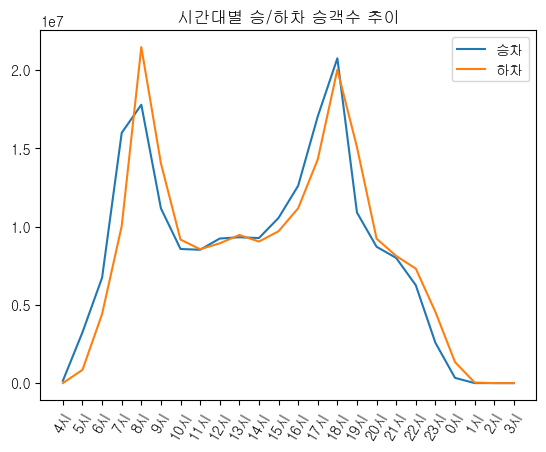

In [54]:
with open('../day09/data/202308_timeline.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    
    # 시간대별 승/하차 승객수
    persons_in = [0] * 24
    persons_out = [0] * 24

    
    for row in data:
        # 4~3시 승객수',' 제거, 정수변환
        # 어차피 승하차 다 구해야 하니 step1로 끝까지 하렜음.
        row[4:] = map(str_to_int, row[4:])
#         print(row)
        for i in range(24):
            persons_in[i] += row[4 + 2 * i]
            persons_out[i] += row[5 + 2 * i]
        
    print(persons_in)
    titles = [str((i+4)%24)+'시' for i in range(24)]
    plt.rc('font', family='gulim')
    plt.title('시간대별 승/하차 승객수 추이')
    plt.plot(titles, persons_in, label='승차')
    plt.plot(titles, persons_out, label='하차')
    plt.xticks(rotation=60)
    plt.legend()

## 시간대별 승차승객수 최다 지하철역

In [60]:
with open('../day09/data/202308_timeline.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    
    # 시간대별 승/하차 승객수
    stations = [0]*24
    persons_in = [0] * 24
    
    for row in data:
        # 4~3시 승객수',' 제거, 정수변환
        # 어차피 승하차 다 구해야 하니 step1로 끝까지 하렜음.
        row[4:] = map(str_to_int, row[4:])
#         print(row)

        #시간대별 최다 승차역
        for i in range(24):
            if persons_in[i] < row[4+2*i]:
                stations[i] = row[3]
                persons_in[i] = row[4+2*i]
                
    for i in range(24):
        print(f'{str((i+4)%24)}시 :{stations[i]}, {persons_in[i]}명')
#     print(stations)
#     print(persons_in)
    
#     titles = [str((i+4)%24)+'시' for i in range(24)]
#     plt.rc('font', family='gulim')
#     plt.title('시간대별 승/하차 승객수 추이')
#     plt.plot(titles, persons_in, label='승차')
#     plt.plot(titles, persons_out, label='하차')
#     plt.xticks(rotation=60)
#     plt.legend()

4시 :구로, 12237명
5시 :부천, 38101명
6시 :신림, 70796명
7시 :신림, 186200명
8시 :신림, 267850명
9시 :신림, 159802명
10시 :신림, 87820명
11시 :잠실(송파구청), 79318명
12시 :잠실(송파구청), 89447명
13시 :강남, 102025명
14시 :강남, 112582명
15시 :강남, 135730명
16시 :강남, 165359명
17시 :강남, 255070명
18시 :삼성(무역센터), 326888명
19시 :강남, 208701명
20시 :잠실(송파구청), 165968명
21시 :홍대입구, 187157명
22시 :홍대입구, 183147명
23시 :홍대입구, 92368명
0시 :강남, 12953명
1시 :대화, 8명
2시 :지축, 3명
3시 :개화, 3명


## 교수님 풀이

4시 경부선(구로) : 12237
5시 경인선(부천) : 38101
6시 2호선(신림) : 70796
7시 2호선(신림) : 186200
8시 2호선(신림) : 267850
9시 2호선(신림) : 159802
10시 2호선(신림) : 87820
11시 2호선(잠실(송파구청)) : 79318
12시 2호선(잠실(송파구청)) : 89447
13시 2호선(강남) : 102025
14시 2호선(강남) : 112582
15시 2호선(강남) : 135730
16시 2호선(강남) : 165359
17시 2호선(강남) : 255070
18시 2호선(삼성(무역센터)) : 326888
19시 2호선(강남) : 208701
20시 2호선(잠실(송파구청)) : 165968
21시 2호선(홍대입구) : 187157
22시 2호선(홍대입구) : 183147
23시 2호선(홍대입구) : 92368
0시 2호선(강남) : 12953
1시 일산선(대화) : 8
2시 3호선(지축) : 3
3시 9호선(개화) : 3


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '4시-경부선(구로)'),
  Text(1, 0, '5시-경인선(부천)'),
  Text(2, 0, '6시-2호선(신림)'),
  Text(3, 0, '7시-2호선(신림)'),
  Text(4, 0, '8시-2호선(신림)'),
  Text(5, 0, '9시-2호선(신림)'),
  Text(6, 0, '10시-2호선(신림)'),
  Text(7, 0, '11시-2호선(잠실(송파구청))'),
  Text(8, 0, '12시-2호선(잠실(송파구청))'),
  Text(9, 0, '13시-2호선(강남)'),
  Text(10, 0, '14시-2호선(강남)'),
  Text(11, 0, '15시-2호선(강남)'),
  Text(12, 0, '16시-2호선(강남)'),
  Text(13, 0, '17시-2호선(강남)'),
  Text(14, 0, '18시-2호선(삼성(무역센터))'),
  Text(15, 0, '19시-2호선(강남)'),
  Text(16, 0, '20시-2호선(잠실(송파구청))'),
  Text(17, 0, '21시-2호선(홍대입구)'),
  Text(18, 0, '22시-2호선(홍대입구)'),
  Text(19, 0, '23시-2호선(홍대입구)'),
  Text(20, 0, '0시-2호선(강남)'),
  Text(21, 0, '1시-일산선(대화)'),
  Text(22, 0, '2시-3호선(지축)'),
  Text(23, 0, '3시-9호선(개화)')])

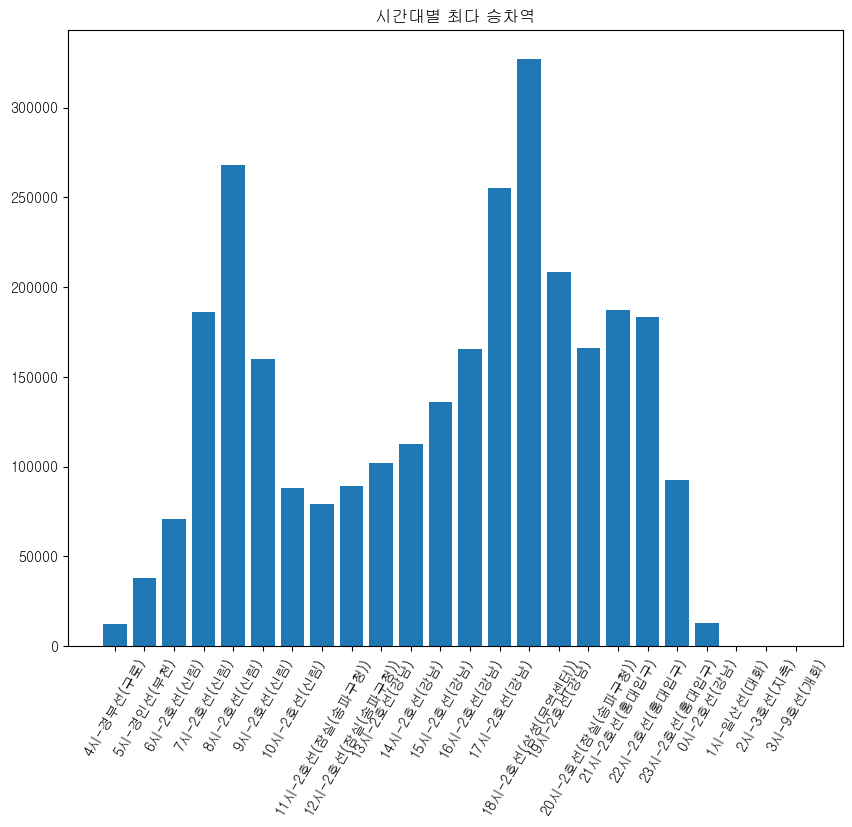

In [80]:
with open('../day09/data/202308_timeline.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    
    max_persons_in = [0] * 24
    station_in = ['']*24
    for row in data:
        row[4:] = map(str_to_int, row[4:])
    
        #시간대별 승객수 비교
        for i in range(24):
            if max_persons_in[i] < row[4+2*i]:
                max_persons_in[i] = row[4+2*i]
                station_in[i] = f'{row[1]}({row[3]})'
                
    for i in range(24):
        print(f'{(i+4)%24}시 {station_in[i]} : {max_persons_in[i]}')
        #이때 동일한 역명은 하나의 그래프로 나오로 수 있으므로 시간을 붙여서 일부러 이름을 다 다르게 해줌.
        station_in[i] = f'{(i+4)%24}시-{station_in[i]}'
        
# plt.rc('font', family='gulim')
plt.figure(figsize=(10, 8))
plt.title('시간대별 최다 승차역')
plt.bar(station_in, max_persons_in)
plt.xticks(rotation=60)

## 하차는 아래로 나오도록